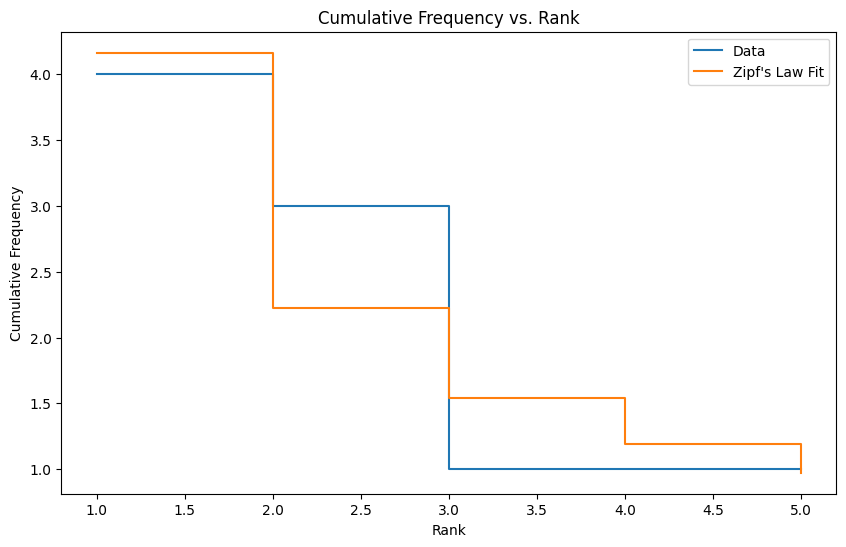

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 假设 data 是你的数据列表
data = np.array([1, 1, 3, 4, 1])

# 对数据进行排序
sorted_data = np.sort(data)[::-1]
ranks = np.arange(1, len(sorted_data) + 1)

# 计算Zipf's Law的拟合参数
params, _ = curve_fit(lambda r, a, b: a / (r ** b), ranks, sorted_data)

# 绘制原始数据的累积频率图
plt.figure(figsize=(10, 6))
plt.step(ranks, sorted_data, where='post', label='Data')
plt.xlabel('Rank')
plt.ylabel('Cumulative Frequency')

# 绘制Zipf's Law拟合曲线
zipf_law = lambda r: params[0] / (r ** params[1])
plt.step(ranks, zipf_law(ranks), where='post', label='Zipf\'s Law Fit')

plt.legend()
plt.title('Cumulative Frequency vs. Rank')
plt.show()

MSE: 0.20508635414689702
RMSE: 0.4528646090686454
KS Statistic: 0.4
KS P-value: 0.873015873015873


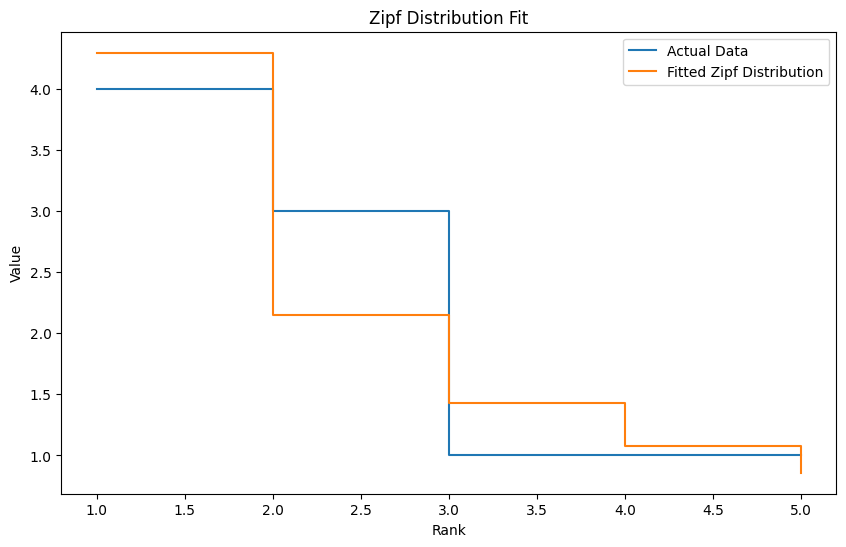

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import zipf, kstest
from sklearn.metrics import mean_squared_error

# 假设 data 是你的数据列表
data = np.array([1, 1, 3, 4, 1])

# 对数据进行排序
sorted_data = np.sort(data)[::-1]

# 计算排名
ranks = np.arange(1, len(sorted_data) + 1)

# 拟合幂律分布
def zipf_law(r, a):
    return a / r

params, _ = curve_fit(zipf_law, ranks, sorted_data, maxfev=10000)

# 计算拟合后的频率
fitted_values = zipf_law(ranks, *params)

# 计算MSE和RMSE
mse = mean_squared_error(sorted_data, fitted_values)
rmse = np.sqrt(mse)

# 输出评估指标
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# 计算KS统计量和p值
ks_stat, ks_pvalue = kstest(sorted_data, fitted_values)

print(f"KS Statistic: {ks_stat}")
print(f"KS P-value: {ks_pvalue}")

# 绘制实际数据和拟合曲线
plt.figure(figsize=(10, 6))
plt.step(ranks, sorted_data, where='post', label='Actual Data')
plt.step(ranks, fitted_values, where='post', label='Fitted Zipf Distribution')
plt.xlabel('Rank')
plt.ylabel('Value')
plt.title('Zipf Distribution Fit')
plt.legend()
plt.show()

MSE: 25.31113456255039
RMSE: 5.031017249279751
KS Statistic: 0.8333333333333334
KS P-value: 0.025974025974025972


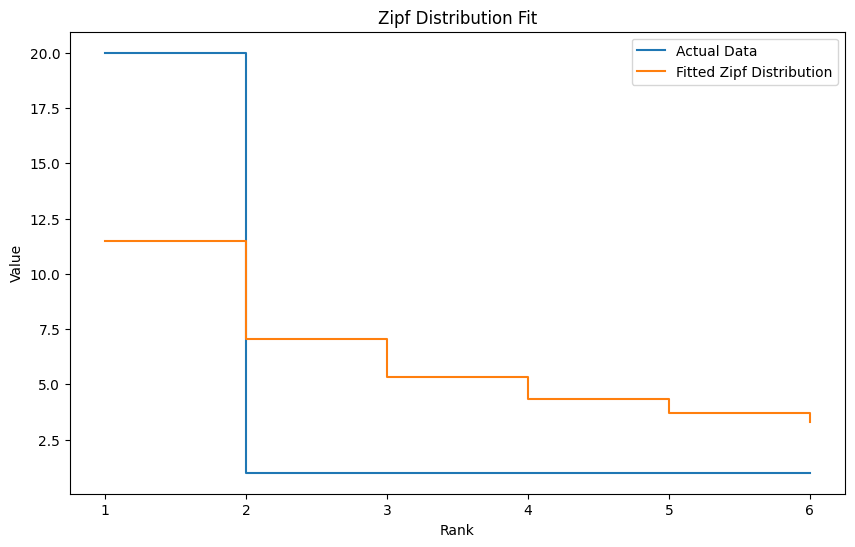

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import zipf, kstest
from sklearn.metrics import mean_squared_error

# 假设 data 是你的数据列表
data = np.array([1, 20, 1, 1, 1, 1])

# 对数据进行排序
sorted_data = np.sort(data)[::-1]

# 计算排名
ranks = np.arange(1, len(sorted_data) + 1)

# 拟合幂律分布
def zipf_law(r, a):
    return a / (r ** 0.7)

params, _ = curve_fit(zipf_law, ranks, sorted_data, maxfev=10000)

# 计算拟合后的频率
fitted_values = zipf_law(ranks, *params)

# 计算MSE和RMSE
mse = mean_squared_error(sorted_data, fitted_values)
rmse = np.sqrt(mse)

# 输出评估指标
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# 计算KS统计量和p值
ks_stat, ks_pvalue = kstest(sorted_data, fitted_values)

print(f"KS Statistic: {ks_stat}")
print(f"KS P-value: {ks_pvalue}")

# 绘制实际数据和拟合曲线
plt.figure(figsize=(10, 6))
plt.step(ranks, sorted_data, where='post', label='Actual Data')
plt.step(ranks, fitted_values, where='post', label='Fitted Zipf Distribution')
plt.xlabel('Rank')
plt.ylabel('Value')
plt.title('Zipf Distribution Fit')
plt.legend()
plt.show()

In [25]:
import numpy as np
from scipy.stats import skew, kurtosis

# 假设 data 是你的数据列表
data = np.array([1, 2, 1, 1, 1, 1])

# 计算均值
mean_value = np.mean(data)

# 计算中位数
median_value = np.median(data)

# 计算方差
variance_value = np.var(data)

# 计算标准差
std_dev_value = np.std(data)

# 计算变异系数
cv_value = std_dev_value / mean_value

# 计算偏度
skewness_value = skew(data)

# 计算峰度
kurtosis_value = kurtosis(data)

# 输出统计指标
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_dev_value}")
print(f"Coefficient of Variation (CV): {cv_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

# 根据指标判断数据是否平均
# 这里只是提供一个简单的判断逻辑，实际情况可能需要更复杂的分析
if abs(skewness_value) < 0.5 and cv_value < 0.5:
    print("The data is approximately average.")
else:
    print("The data is not average.")

Mean: 1.1666666666666667
Median: 1.0
Variance: 0.13888888888888887
Standard Deviation: 0.3726779962499649
Coefficient of Variation (CV): 0.31943828249996986
Skewness: 1.7888543819998313
Kurtosis: 1.1999999999999993
The data is not average.


In [2]:
import pandas as pd

# 创建一个示例 DataFrame
df = pd.DataFrame({
    'Category': ['A', 'A', 'B', 'B'],
    'Year': [2018, 2019, 2018, 2019],
    'Sales': [100, 150, 200, 250]
})

# 创建透视表，使用单个聚合函数 'sum'
pivot_table_df_sum = df.pivot_table(
    index='Category',
    columns='Year',
    values='Sales',
    aggfunc='sum'
)

# 创建透视表，使用多个聚合函数 ('sum' 和 'mean')
pivot_table_df_multi_agg = df.pivot_table(
    index='Category',
    columns='Year',
    values='Sales',
    aggfunc=['sum', 'mean']
)

print("使用单个聚合函数的透视表:")
print(pivot_table_df_sum)
print(pivot_table_df_sum.columns.names)
print(pivot_table_df_sum.index.names)
print("\n使用多个聚合函数的透视表:")
print(pivot_table_df_multi_agg)

使用单个聚合函数的透视表:
Year      2018  2019
Category            
A          100   150
B          200   250
['Year']
['Category']

使用多个聚合函数的透视表:
          sum        mean       
Year     2018 2019   2018   2019
Category                        
A         100  150  100.0  150.0
B         200  250  200.0  250.0


/root/miniconda3/envs/analysis/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


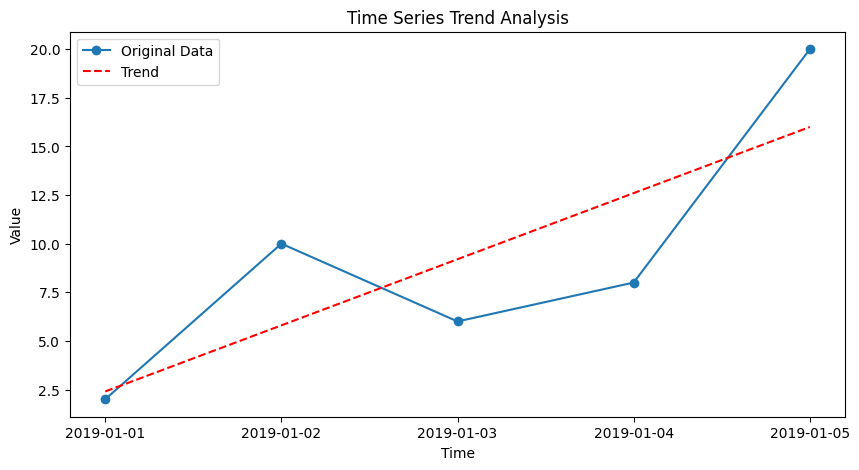

趋势分量的变化: 3.40000009348127
时间序列的整体趋势描述: 上升趋势


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 假设我们有一个DataFrame 'df'，其中包含时间序列数据
# 数据列名为 'time' 和 'value'
df = pd.DataFrame({'time': ['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05'], 'value': [2, 10, 6, 8, 20]})


# 假设我们有一个DataFrame 'df'，其中包含时间序列数据
# 数据列名为 'time' 和 'value'

# 选择时间列作为模型的索引
df.set_index('time', inplace=True)

# 使用Holt-Winters方法进行指数平滑，并拟合趋势
model = ExponentialSmoothing(df['value'], trend='add', seasonal=None, initialization_method="estimated").fit()

# 获取拟合的趋势线
trend = model.fittedvalues


# 绘制原始数据点
plt.figure(figsize=(10, 5))
plt.plot(df['value'], label='Original Data', marker='o')

# 绘制趋势线
plt.plot(trend, label='Trend', linestyle='--', color='red')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Time Series Trend Analysis')
plt.xlabel('Time')
plt.ylabel('Value')

# 显示图表
plt.show()



# 计算趋势分量的变化
trend_changes = trend.diff().dropna()

print(f"趋势分量的变化: {trend_changes.mean()}")

# 观察趋势变化
if trend_changes.mean() > 0.8:
    trend_description = "上升趋势"
elif trend_changes.mean() < 0:
    trend_description = "下降趋势"
else:
    trend_description = "稳定趋势"

# 打印趋势描述
print(f"时间序列的整体趋势描述: {trend_description}")

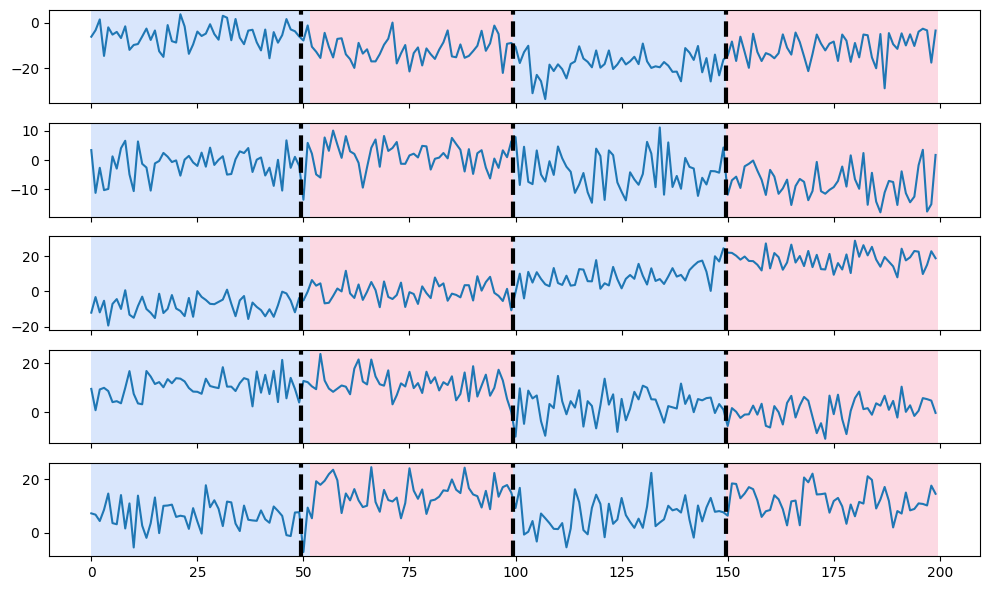

In [10]:
import numpy as np
import matplotlib.pylab as plt
import ruptures as rpt

dim = 5  # dimension of the signal

# creation of data
n = 200  # number of samples
n_bkps, sigma = 3, 5  # number of change points, noise standard deviation
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)


# change point detection
model = "l2"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(signal)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()

my_bkps = algo.predict(pen=np.log(n) * dim * sigma**2)
# or
my_bkps = algo.predict(epsilon=3 * n * sigma**2)

algo = rpt.Binseg(model=model, jump=10).fit(signal)

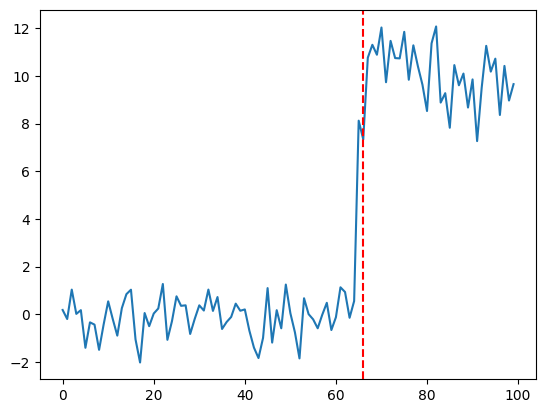

In [7]:
import matplotlib.pyplot as plt
import ruptures as rpt
import numpy as np

mean = 0
std_dev = 1
length_of_series = 100
values = np.random.normal(mean, std_dev, length_of_series)

values[-35:] = values[-35:] + 10

# 找拐点
algo = rpt.Dynp(model="l2", min_size=3, jump=3).fit(values)
# 检测断点，指定最大断点数
result = algo.predict(n_bkps=1)
result = result[:-1]
# 显示结果
plt.plot(values)
for bkp in result:
    plt.axvline(x=bkp, color='r', linestyle='--')
# plt.savefig("change_point_detection.png", dpi=800)
plt.show()

[42, 63, 70, 100]


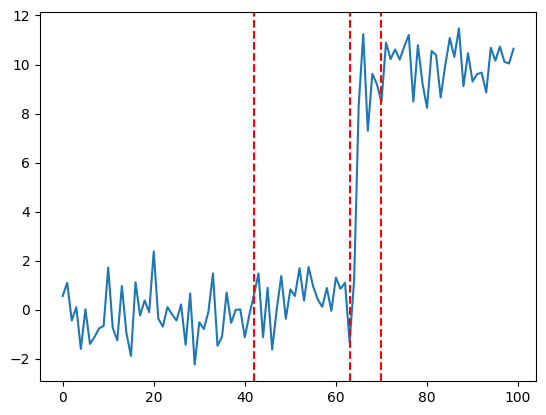

In [8]:
mean = 0
std_dev = 1
length_of_series = 100
values = np.random.normal(mean, std_dev, length_of_series)

values[-35:] = values[-35:] + 10
model = "l2"  # "l1", "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=7).fit(values)
my_bkps = algo.predict(pen=3)
# show results
print(my_bkps)
result = my_bkps[:-1]
# 显示结果
plt.plot(values)
for bkp in result:
    plt.axvline(x=bkp, color='r', linestyle='--')
plt.savefig('changepoint_detection.png',dpi=800,bbox_inches='tight')
plt.show()

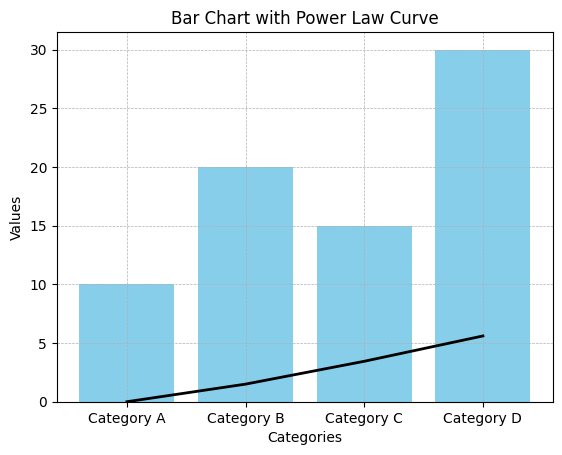

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [10, 20, 15, 30]

# 定义幂律函数的参数
a = 1.5
b = 1.2

# 生成X轴数据，这里使用类别的索引作为X轴的值
x = np.arange(len(categories))

# 计算Y轴数据，即幂律函数的值
y = a * x**b

# 创建一个新的图表
plt.figure()

# 绘制条形图
plt.bar(categories, values, color='skyblue')

# 绘制幂律函数的曲线
plt.plot(x, y, 'black', linewidth=2)

# 添加标题和标签
plt.title('Bar Chart with Power Law Curve')
plt.xlabel('Categories')
plt.ylabel('Values')

# 可以添加网格线以便更好地观察曲线与条形的关系
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 显示图表
plt.show()